# Preprocessing

### A suite of preprocess toolkit

## Load Libraries

In [1]:
import sys
sys.path.append("..")
from util import *
from util.parser import *
from util.img_kit import *
from util.notebook_display import *
from IPython import display
import numpy as np
from scipy import ndimage
from scipy import misc
from os import walk
import os
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (5.0, 5.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

## Resize Images

In [18]:
# size = (256, 256)
size = (128, 128)
# img_folder = "data/moving-box/frames/ffmpeg"
img_folder = "data/moving-box/frames/moving-box-uniform/"
output = os.path.join(img_folder, "x".join([str(x) for x in size]))
# resize_all(img_folder, output, size)
# print("Images in {} resized to {}, \n         saved in {}".format(img_folder, str(size), output))

## Convert Images to Gray Scale

original dim: (720, 960, 3)
grayed   dim: (720, 960)


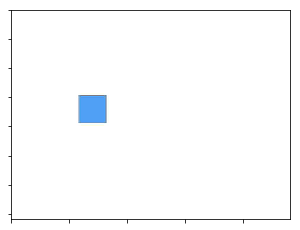

In [67]:
folder = "data/moving-box/frames/moving-box-non-uniform"
imgs = imgs_in_folder(folder, "jpg")
sample = sample_and_show(imgs)
grayed = rgb2gray(sample)
print("original dim: {}".format(sample.shape))
print("grayed   dim: {}".format(grayed.shape))

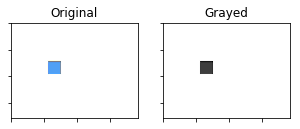

In [16]:
plt.axis('off')
ax = plt.subplot(1, 2, 1)
ax.set_aspect('equal')
disable_axis(ax)
plt.title("Original")
plt.imshow(sample)
ax = plt.subplot(1, 2, 2)
disable_axis(ax)
plt.title("Grayed")
plt.imshow(grayed)

## Compress and Save

Load img from file: shape = (720, 960)


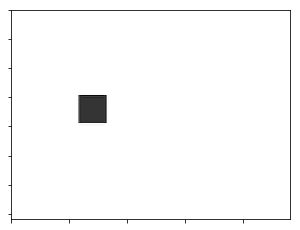

In [68]:
np.savez_compressed("tmp/grayed", imgs = grayed)
grayed_from_file = np.load("tmp/grayed.npz")['imgs']
print("Load img from file: shape = {}".format(grayed_from_file.shape))
plot_img(grayed_from_file)

## Reside All Images, Grayscale, Compress and Save

### Box

In [2]:
def process_imgs_in_folder(folder, size, save_path, ext = "jpeg"):
    imgs = imgs_in_folder(folder, ext)
    resized_imgs = [resize(img, size) for img in imgs]
    grayed_imgs = [rgb2gray(img) for img in resized_imgs]
    processed = np.array(grayed_imgs)
    info = {"images:": folder.split("/")[-1], "dim": processed.shape}
    np.savez_compressed(save_path, imgs = processed, info = info)

In [35]:
i =1
name = "test"
folder = "../data/football/%s"%(name)
imgs = imgs_in_folder(folder, "png")
print("Images in folder: {}".format(len(imgs)))
size = (288, 352)
imgs = [resize(img, size) for img in imgs]
print("resized shape:    {}".format(sample_img(resized_imgs).shape))
# imgs = [rgb2gray(img) for img in resized_imgs]
# print("grayed shape:     {}".format(sample_img(imgs).shape))

imgs = np.array(imgs)
print("Processed:        {}".format(imgs.shape))
info = {"images:": "football-{}-{}".format(name, i), "dim": imgs.shape}

save_path = "../data/football-352x288/football-{}-{}".format(name, i, "x".join(str(x) for x in size))
np.savez_compressed(save_path, imgs = imgs, info = info)
print("Saved to:         {}".format(save_path))

Images in folder: 40
resized shape:    (96, 128, 3)
Processed:        (40, 288, 352, 3)
Saved to:         ../data/football-352x288/football-test-1


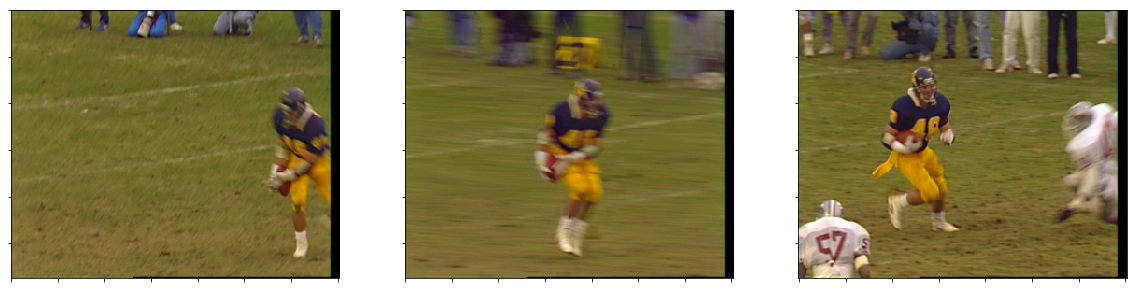

(3, 288, 352, 3)


In [36]:
sample = sample_and_show_many(imgs, 3, size = (20, 8))
print(sample.shape)

## Process Exercise

In [5]:
for name in ["%02d"%i for i in range(1, 13)]:
    folder = "../data/Exercise-Frames/train/" + name
    imgs = imgs_in_folder(folder, "png")
    print("Images in folder: {}".format(len(imgs)))
    size = (128, 128)
    resized_imgs = [resize(img, size) for img in imgs]
    print("resized shape:    {}".format(sample_img(resized_imgs).shape))

    processed = np.array(resized_imgs)
    print("Processed:        {}".format(processed.shape))
    info = {"images:": "Exercise-Train-{}".format(name), "dim": processed.shape}

    save_path = "../data/exercise-128x128/train/exercise-128x128-train-{}".format(name)
    np.savez_compressed(save_path, imgs = processed, info = info)
    print("Saved to:         {}".format(save_path))

Images in folder: 3442
resized shape:    (128, 128, 3)
Processed:        (3442, 128, 128, 3)
Saved to:         ../data/exercise-128x128-01
Images in folder: 7134
resized shape:    (128, 128, 3)
Processed:        (7134, 128, 128, 3)
Saved to:         ../data/exercise-128x128-02
Images in folder: 7710
resized shape:    (128, 128, 3)
Processed:        (7710, 128, 128, 3)
Saved to:         ../data/exercise-128x128-03
Images in folder: 4646
resized shape:    (128, 128, 3)
Processed:        (4646, 128, 128, 3)
Saved to:         ../data/exercise-128x128-04
Images in folder: 5258
resized shape:    (128, 128, 3)
Processed:        (5258, 128, 128, 3)
Saved to:         ../data/exercise-128x128-05
Images in folder: 5304
resized shape:    (128, 128, 3)
Processed:        (5304, 128, 128, 3)
Saved to:         ../data/exercise-128x128-06
Images in folder: 4488
resized shape:    (128, 128, 3)
Processed:        (4488, 128, 128, 3)
Saved to:         ../data/exercise-128x128-07
Images in folder: 7050
resi

In [6]:
folder = "../data/Exercise-Frames/test/" 
imgs = imgs_in_folder(folder, "png")
print("Images in folder: {}".format(len(imgs)))
size = (128, 128)
resized_imgs = [resize(img, size) for img in imgs]
print("resized shape:    {}".format(sample_img(resized_imgs).shape))

processed = np.array(resized_imgs)
print("Processed:        {}".format(processed.shape))
info = {"images:": "Exercise-Test-{}".format(name), "dim": processed.shape}

save_path = "../data/exercise-128x128/test/exercise-128x128-test-{}".format(name)
np.savez_compressed(save_path, imgs = processed, info = info)
print("Saved to:         {}".format(save_path))

Images in folder: 1000
resized shape:    (128, 128, 3)
Processed:        (1000, 128, 128, 3)
Saved to:         ../data/exercise-128x128/test/exercise-128x128-test-12


## Process Tennis

In [3]:
folder = "../data/tennis-raw"
imgs = imgs_in_folder(folder, "jpg")
print("Images in folder: {}".format(len(imgs)))
size = (160, 256)
resized_imgs = [resize(img, size) for img in imgs]
print("resized shape:    {}".format(sample_img(resized_imgs).shape))

processed = np.array(resized_imgs)\

Images in folder: 466
resized shape:    (160, 256, 3)


In [4]:
print(processed.shape)

(466, 160, 256, 3)


In [6]:
trains = [processed[:200], processed[280:]]
test = [processed[200:280]]
for i, train in enumerate(trains):
    print("Processed:        {}".format(train.shape))
    info = {"images:": "Tennis-train-{}".format(i+1), "dim": train.shape}
    save_path = "../data/tennis-train-{}-{}".format(i+1, "x".join(str(x) for x in size))
    np.savez_compressed(save_path, imgs = train, info = info)
    print("Saved to:         {}".format(save_path))

Processed:        (200, 160, 256, 3)
Saved to:         ../data/tennis-train-1-160x256
Processed:        (186, 160, 256, 3)
Saved to:         ../data/tennis-train-2-160x256


In [7]:
for i, t in enumerate(test):
    print("Processed:        {}".format(t.shape))
    info = {"images:": "Tennis-test-{}".format(i+1), "dim": t.shape}
    save_path = "../data/tennis-test-{}-{}".format(i+1, "x".join(str(x) for x in size))
    np.savez_compressed(save_path, imgs = t, info = info)
    print("Saved to:         {}".format(save_path))

Processed:        (80, 160, 256, 3)
Saved to:         ../data/tennis-test-1-160x256


#### Test

In [34]:
data = np.load(save_path + ".npz")
imgs, info = data['imgs'], data['info']
print("imgs shape:     {}".format(imgs.shape))
print("info:           {}".format(info))

imgs shape:     (466, 160, 256, 3)
info:           {'images:': 'Tennis', 'dim': (0, 160, 256, 3)}


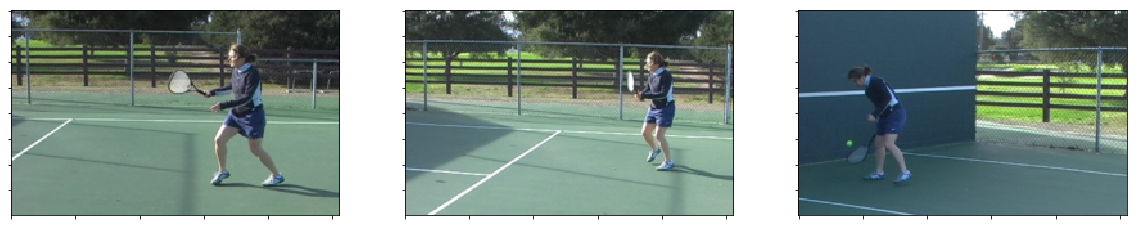

(3, 160, 256, 3)


In [38]:
sample = sample_and_show_many(imgs, 3, size = (20, 8))
print(sample.shape)

In [59]:
def resize_all(folder, output, size):
    folders = [f[0] for f in os.walk(folder)][1:]
    for f in folders:
        filename = f.split('/')[-1]
        process_imgs_in_folder(f, size, os.path.join(output, filename))
    
resize_all("data/moving-box/frames",  "data/moving-box/processed-64x64", (64, 64))

data/moving-box/frames/bigCircle
data/moving-box/processed-64x64/bigCircle
data/moving-box/frames/bigCircle-2
data/moving-box/processed-64x64/bigCircle-2
data/moving-box/frames/bigCircle-3
data/moving-box/processed-64x64/bigCircle-3
data/moving-box/frames/bigCircle-4
data/moving-box/processed-64x64/bigCircle-4
data/moving-box/frames/bigSquare-diagnal
data/moving-box/processed-64x64/bigSquare-diagnal
data/moving-box/frames/bigSquare-diagnal-2
data/moving-box/processed-64x64/bigSquare-diagnal-2
data/moving-box/frames/bigSquare-vertical
data/moving-box/processed-64x64/bigSquare-vertical
data/moving-box/frames/bigSquare-vertical-2
data/moving-box/processed-64x64/bigSquare-vertical-2
data/moving-box/frames/bigSquare-vertical-3
data/moving-box/processed-64x64/bigSquare-vertical-3
data/moving-box/frames/circle
data/moving-box/processed-64x64/circle
data/moving-box/frames/circle-diagnal
data/moving-box/processed-64x64/circle-diagnal
data/moving-box/frames/circle-diagnal-2
data/moving-box/proce

AssertionError: No images in folder!

### Animation

In [17]:
folder = "data/kid-swing"
imgs = imgs_in_folder(folder, "jpg")
print("Images in folder: {}".format(len(imgs)))
size = (64, 128) # (H, W)
resized_imgs = [resize(img, size) for img in imgs]
print("resized shape:    {}".format(sample_img(resized_imgs).shape))
grayed_imgs = [rgb2gray(img) for img in resized_imgs]
print("grayed shape:     {}".format(sample_img(grayed_imgs).shape))
processed = np.array(grayed_imgs)
print("Processed:        {}".format(processed.shape))
info = {"images:": "moving box uniform", "dim": processed.shape}

save_path = "data/Animation/kidSwing-{}".format("x".join(str(x) for x in size))
np.savez_compressed(save_path, imgs = processed, info = info)
print("Saved to:         {}".format(save_path))

Images in folder: 42
resized shape:    (64, 128, 3)
grayed shape:     (64, 128)
Processed:        (42, 64, 128)
Saved to:         data/Animation/kidSwing-64x128


In [20]:
data = np.load(save_path + ".npz")
imgs, info = data['imgs'], data['info']
print("imgs shape:     {}".format(imgs.shape))
print("info:           {}".format(info))

imgs shape:     (42, 64, 128)
info:           {'images:': 'moving box uniform', 'dim': (42, 64, 128)}


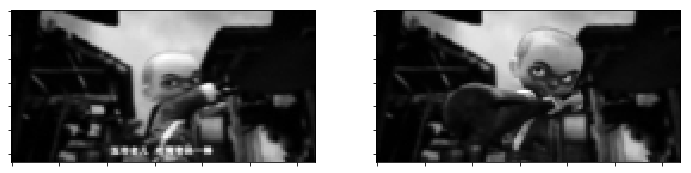

In [22]:
sample_and_show_many(imgs, 2)